# 주파수 (frequence)
- 영상을 데이터로 표현하는 데에는 크게 두 가지 영역으로 나누어 설명한다. 바로 화소값이 직접 표현된 공간 영역(spatial domain)이며, 다른 하나가 우주 공간과 같은 변현 영역(transform domain) 이다 
- 변환 영역은 직교 변환에 의해 얻어진 영상 데이터의 다른 표현이다. 여기서는 화소값이 직접 표현되는 것이 아니고 변환계수(coeffcient)로 표현된다. 대표적인 변환은 DCT(Discrete Cosine Transform)와 DFT(Discrete Fourier Transform)가 있다 
- 퓨리에 변환은 시간(혹은 공간) 영역에서 주파수 영역으로의 변환으로 "모든 파형은 단순한 정현파의 합으로 구성된다"라는 개념에 기초한 해석적인 방법이다 

#### 공간 주파수의 이해
- 라디오 방송이나 채널이나 휴대폰의 통신 대역에서 헤르츠(Hz)라는 표현을 들어 보았을 것이다. 바로 주파수를 표현하는 단위이다 
- 그러나 이것은 전파라는 신호에 국한된 표현이라 할 수 있으며, 아닐로그 신호를 디질터화 하는 과정에서 시간 단위로 샘플링하는 횟수를 지정할 때에 Hz는 단위와 함께 샘플링 주파수라는 표현을 사용한다. 
- 영상처리에서도 공간 주파수 (spatial frequency)라는 개념을 사용한다. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
t = np.arange(0,1,0.001)   # 샘플링 범위 및 개수
Hz = [1, 2, 10, 100]        #  주파수 예시
gs = [np.sin(2 * np.pi * t * h) for h in Hz]  #sin 함수 계산 

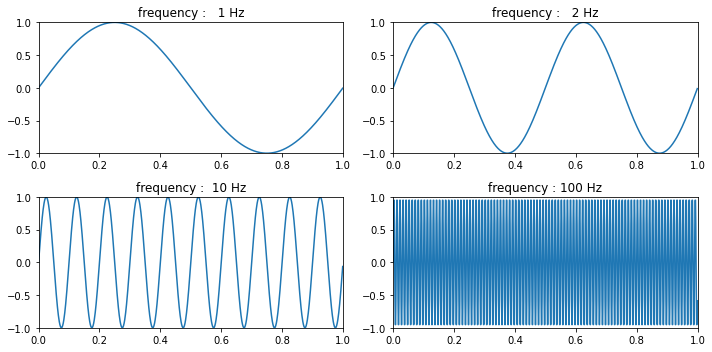

In [5]:
plt.figure(figsize=(10,5))
for i, g in enumerate(gs):
    plt.subplot(2, 2, i+1), plt.plot(t, g) # 그래프
    plt.xlim(0, 1), plt.ylim(-1, 1)
    plt.title("frequency : %3d Hz" % Hz[i])
    
plt.tight_layout()
plt.show()

- 공간 주파수는 밝기가 얼마나 빨리 변하는가에 따라서 고주파 영역과 저주파 영역으로 분류한다 
- 저주파 영역은 화소 밝기가 거의 변화가 없거나 점진적으로 변화하는 것을 말하며, 고주파 영역은 화소 밝기가 급변하는 곳을 고주파라 한다 
- 주로, 영상에서 배경부분이나 객체의 내부에 저주파 공간 영역이며, 경계부분이나 객체의 모서리 부분이 고주파 영역이다 

### 주파수 영역에서의 영상처리 과정 
- 영상이 입력되면 주파수 영역으로 변환하며, 주파수 변환으로 얻어진 계수의 특정 주파수 영역에 원하는 영상처리를 적용한다. 마지막으로 처리가 적용된 후에는 다시 주파수 역변환을 통해서 공간 영역의 영상으로 변환해서 출력 영상을 생성한다 

(입력 영상) => (주파수 변환 -> 주파수 영역처리 -> 주파수 역변환) => (출력 영상)